# Exploitation des métadonnées de math.SG pour post

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# in my csv, list_categories are strings, with categories separated by |
# this will return an actual list (which cannot be saved to csv...)

def split_categories(str):
    return [cat for cat in str.split(" | ") if all(a.isalpha() or a == '.' for a in cat)]

# Last condition allows to avoid MathSciNet classification codes like 14R57 
# and key-words ("bigger group" -- really?)

In [3]:
data = pd.read_csv('arXiv_SG_total_formatted.csv', index_col=0)
data = data.drop(columns=['Unnamed: 0.1'])
data['categories'] = data['list_categories'].map(lambda x: split_categories(x))

In [4]:
data.tail(1)

,id,updated,published,title,summary,primary_category,comment,final_version,nb_authors,nb_category,list_authors,list_categories,categories
7045,2005.09568v1,2020-05-19T16:29:22Z,2020-05-19T16:29:22Z,The singular Weinstein conjecture,"In this article, we investigate Reeb dynamics ...",math.SG,"30 pages, 6 figures, this paper extends and im...",1,2,3,Eva Miranda | Cédric Oms,math.SG | math.DG | math.DS,"[math.SG, math.DG, math.DS]"


In [6]:
# list all possible secondary categories when primary = SG with multiplicity and vice-versa
seccat, primcat = [], []
for ind in data.index:
    if data.loc[ind,'primary_category'] == 'math.SG': seccat += data.loc[ind,'categories']
    else: primcat.append(data.loc[ind,'primary_category'])

# get set of all of these (no multiplicity)
# math.SG should be removed (+ 'NA' when no secondary category where specified) from seccat
seccat_unique = set(seccat)
seccat_unique.remove('NA')
seccat_unique.remove('math.SG')

list_cat = seccat_unique.union(set(primcat))

# get multiplicity of each category as dict
seco = {k: seccat.count(k) if k in seccat else 0 for k in list_cat}
prim = {k: primcat.count(k) if k in primcat else 0 for k in list_cat}

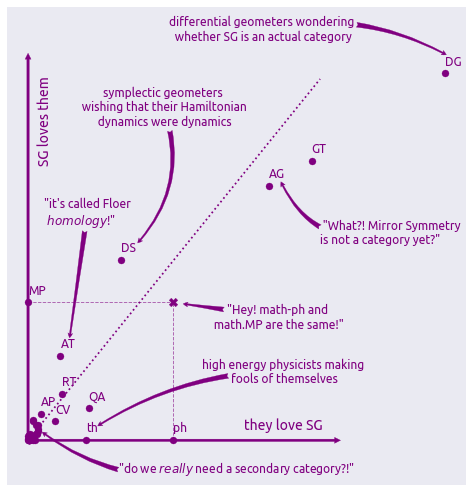

In [8]:
plt.style.use('seaborn')

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=['purple'])
# curieusement, malgré la commande précédente, ne pas rappeler purple pour les flêches les rend moins foncées...
mpl.rcParams['text.color'] = 'purple'
plt.rcParams["font.family"] = "ubuntu"
plt.rcParams["font.size"] = "12"

plt.figure(figsize=(7,7))
plt.scatter(prim.values(),seco.values())

# write name of categories with more than nb hits
nb = 45
with_name = [k for k in list_cat if max(seco[k],prim[k]) > nb]
for cat in with_name: plt.annotate(cat[-2:], xy = (1,1), xytext = (prim[cat],seco[cat]+15), color="purple")
    
plt.plot([0,650],[0,650],linestyle=':')
plt.plot([0,750],[0,750],linestyle='')

plt.annotate("SG loves them", xy=(0,0), xytext=(20,500), rotation=90, fontsize=14, color="purple")
plt.annotate("they love SG", xy=(0,0), xytext=(480,20), fontsize=14, color="purple")
plt.annotate("", xy = (0,700), xytext = (0,0), arrowprops=dict(arrowstyle="simple", color="purple",), zorder=0)
plt.annotate("", xy = (700,0), xytext = (0,0), arrowprops=dict(arrowstyle="simple", color="purple",), zorder=0)

plt.annotate("high energy physicists making \nfools of themselves",
             xy = (140,18), xytext = (570,100), ha='center', va='bottom',
             arrowprops=dict(arrowstyle="fancy", color="purple",
                        shrinkA=56, shrinkB=8, patchA=None, patchB=None, connectionstyle="arc3,rad=0.15"),)
plt.annotate("symplectic geometers\n wishing that their Hamiltonian\n dynamics were dynamics",
             xy = (244,355), xytext = (300,600), ha='center', va='center',
             arrowprops=dict(arrowstyle="fancy", color="purple",
                        shrinkA=25, shrinkB=0, patchA=None, patchB=None, connectionstyle="arc3,rad=-0.3"),)
plt.annotate("differential geometers wondering\n whether SG is an actual category",
             xy = (960,680), xytext = (520,740), ha='center', va='center',
             arrowprops=dict(arrowstyle="fancy", color="purple",
                        shrinkA=95, shrinkB=15, patchA=None, patchB=None, connectionstyle="arc3,rad=-0.2"),)
plt.annotate('"do we $\it{really}$ need a secondary category?!"',
             xy = (0,35), xytext = (200,-50), ha='left', va='center',
             arrowprops=dict(arrowstyle="fancy", color="purple",
                        shrinkA=118, shrinkB=18, patchA=None, patchB=None, connectionstyle="arc3,rad=-0.26"),)
plt.annotate(' "What?! Mirror Symmetry \nis not a category yet?"',
             xy = (560,470), xytext = (650,350), ha='left', va='bottom',
             arrowprops=dict(arrowstyle="fancy", color="purple",
                        shrinkA=72, shrinkB=3, patchA=None, patchB=None, connectionstyle="arc3,rad=-0.42"),)
plt.annotate('"it\'s called Floer\n $\it{homology}$!"',
             xy = (90,170), xytext = (35,380), ha='left', va='bottom',
             arrowprops=dict(arrowstyle="fancy", color="purple",
                        shrinkA=18, shrinkB=8, patchA=None, patchB=None, connectionstyle="arc3,rad=0"),)

plt.scatter(prim['math-ph'],seco['math.MP'],marker='X',s=75)
plt.plot([prim['math-ph'],prim['math-ph']],[0,seco['math.MP']],alpha=.6,linestyle='--',linewidth=.9)
plt.plot([0,prim['math-ph']],[seco['math.MP'],seco['math.MP']],alpha=.6,linestyle='--',linewidth=.9)
plt.annotate('"Hey! math-ph and\n math.MP are the same!"',
             xy = (prim['math-ph'],seco['math.MP']), xytext = (555,222), ha='center', va='center',
             arrowprops=dict(arrowstyle="fancy", color="purple",
                        shrinkA=54, shrinkB=10, patchA=None, patchB=None, connectionstyle="arc3,rad=0"),)

plt.ylim(-80,780)
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.savefig('SG_love_v2.png')
plt.show()             

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licence Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png"  /></a><br /><a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Licence Creative Commons Attribution - Pas d’Utilisation Commerciale - Partage dans les Mêmes Conditions 4.0 International</a>.